# Work with notes and comments

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import tools as tools
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
plt.rcParams['lines.markersize'] = 1

In [3]:
pairs = tools.note_comment_pairs("avis.json")[:5000]

## Representation: Bag of words + eulidien distance

In [4]:
cv = CountVectorizer()
bow = cv.fit_transform([t[1] for t in pairs])

In [5]:
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)

/Users/maxhsia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/maxhsia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


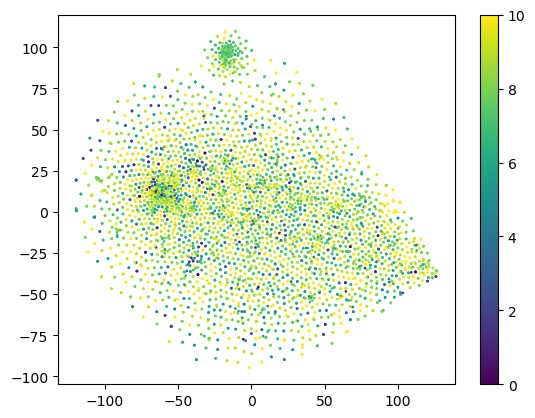

In [6]:
def myscatter(points2d):
  c = [t[0] for t in pairs[:len(points2d)]]
  scatter = plt.scatter(points2d[:, 0], points2d[:, 1], c=c, cmap='viridis')
  plt.colorbar(scatter)
  plt.show()

myscatter(tsne_fit)

### RM

As expected, 1-gram + euclidien distance does not work well. It seems to be able to sometimes be sure of a positive comment though.

## Representation: n-grams + eulidien distance/cos distance

In [7]:
cv = CountVectorizer(ngram_range=[1,3])
bow = cv.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)

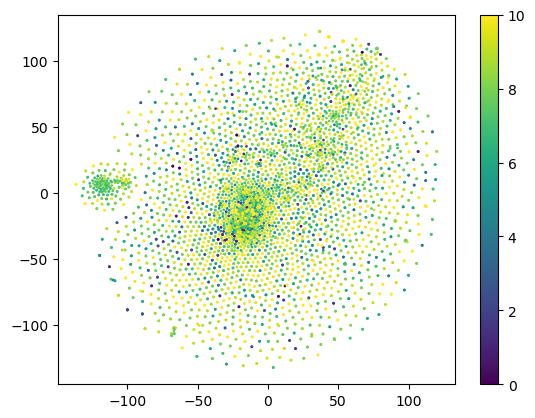

In [8]:
myscatter(tsne_fit)

In [9]:
tsne = TSNE(n_components=2, metric=cosine_similarity)
tsne_fit = tsne.fit_transform(bow[:200])

/Users/maxhsia/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:819: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


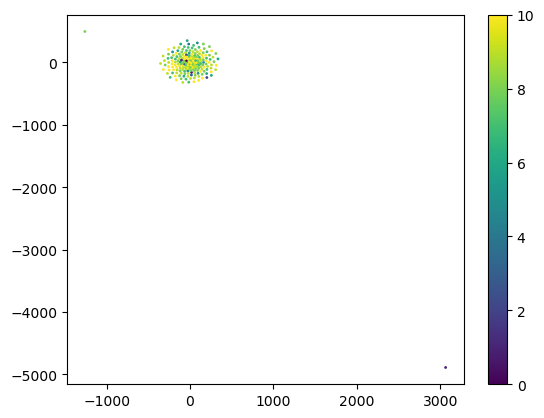

In [10]:
myscatter(tsne_fit)

### RM

Cos distance is slow and quite useless to my surprise. N-grams are a little bit better but nothing too interesting.
Maybe we need to do a normalization.

## Representation: n-grams + TF-IDF + eulidien distance

In [13]:
tfidf = TfidfVectorizer(ngram_range=[1, 2], norm='l2')
bow = tfidf.fit_transform([t[1] for t in pairs])
tsne = TSNE(n_components=2)
tsne_fit = tsne.fit_transform(bow)

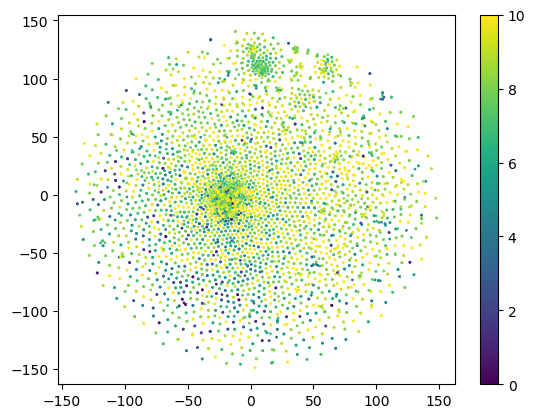

In [14]:
myscatter(tsne_fit)

In [15]:
for i in range(len(tsne_fit)):
  if (abs(tsne_fit[i][0]-5)<10 and abs(tsne_fit[i][1]-100)<10):
    print(pairs[i][0], pairs[i][1])

9.0 Vin d'jeu: Certes ils pouvaient retourner sur les plages qu’ils connaissaient, mais il y avait cette soif de découvrir… Normal pour une race qui, pendant des années et avant d’avoir eu l’excellente idée de se regrouper, se déplace toujours dans la même direction. Cette fusion, cette amitié, cette combinaison permettait d’aller dans un sens ou dans l’autre désormais, une vraie liberté… enfin presque… Car il restait le principal à établir : Une complicité sans faille, une complicité où on n’a pas besoin de se parler pour se comprendre…. Mais ça, c’était encore une longue marche à franchir. La marche du crabe en quelque sorte.

Simple à comprendre, pas facile à gagner, mais tellement subtil !

Si l'avis complet sur Vin d'jeu vous intéresse, c'est par là: https://www.vindjeu.eu/2020/09/11/la-marche-du-crabe/
8.0 Vin d'jeu: Si votre jeu prend la poussière sur votre étagère alors peut-être que c’est le moment de redécouvrir cette perle.
Si votre jeu sort régulièrement, vous aurez sans do

### RM

So the only good chunk that we've got is because vin d'jeu gives only good grades!